In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from trapezoidal import rk_integrator, expand_params

%load_ext autoreload
%autoreload 2
        
def plot_results(x, L_list, tlist):
    n_t = x[:,2:]
    plt.pcolormesh(tlist, 1000*L_list, n_t.T/1000, shading='nearest')
    plt.ylabel(r'Particle size $L$ (mm)')
    plt.xlabel(r'$t$ ($s$)')
    plt.colorbar()
    plt.title(r'Population density (1/mm)')
    plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

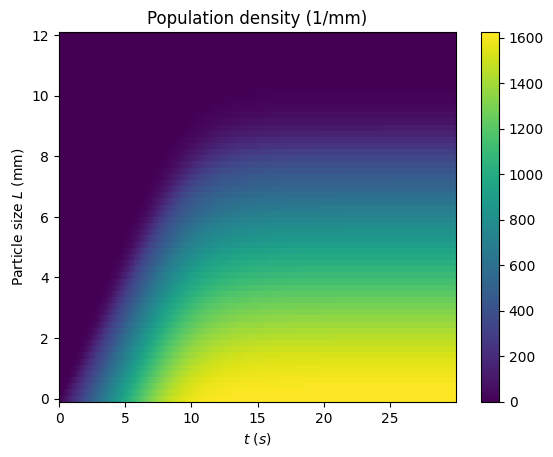

In [6]:
# start by computing a reference with RK4
t_final = 30
L_list = np.linspace(0,1.2e-2,60)

S0 = 1 #initial supersaturation
V0 = 1 #initial volume
n0 = np.zeros_like(L_list) #initial population density distribution
x0 = np.hstack([S0, V0, n0])

p = {"L_list" : L_list, #discretization bins
     'E' :  1e-7, #evaporation rate
     'rho' : 1200, # density of the crystal
     'k_v' : 1, #goes in N_C, volumetric shape factor
     'k_g' : 1e-3, #growth rate constant m/s
     'g' : 1, #power constant for growth
     'k_N' : 1e5, #nucleation rate constant 
     'alpha' :2, #power constant for nucleation
     'weno': False  # use weno or not for differentiation w.r.t. L
     }

p_expand = expand_params(p)


dt = 3e-2
tlist = np.arange(0, t_final, dt)
x_t = rk_integrator(x0, tlist, p)
plot_results(x_t, L_list, tlist)